In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import gc
import datetime

In [2]:
sns.set_palette("Pastel2")

In [3]:
df_customers = pd.read_csv("datasets/olist_customers_dataset.csv")
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
df_customers["customer_unique_id"].nunique()

96096

In [5]:
df_customers["customer_id"].nunique()

99441

In [6]:
df_customers.drop_duplicates(subset="customer_id", inplace=True)
df_customers.drop_duplicates(subset="customer_unique_id", inplace=True)

In [7]:
df_customers.shape

(96096, 5)

In [8]:
df_orders = pd.read_csv("datasets/olist_orders_dataset.csv")
df_orders.shape

(99441, 8)

In [9]:
df = pd.merge(df_customers, df_orders, left_on="customer_unique_id", right_on="customer_id", how="right")
df.shape

(99441, 13)

In [10]:
df_orders_payments = pd.read_csv("datasets/olist_order_payments_dataset.csv")
df_orders_payments.shape

(103886, 5)

In [11]:
df = pd.merge(df, df_orders_payments, left_on="order_id", right_on="order_id", how="right")
df.shape

(103886, 17)

In [12]:
df.head()

,customer_id_x,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,customer_id_y,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,NaN,NaN,NaN,NaN,NaN,b81ef226f3fe1789b1e8b2acac839d17,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22 00:00:00,1,credit_card,8,99.33
1,NaN,NaN,NaN,NaN,NaN,a9810da82917af2d9aefd1278f1dcfa0,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16 00:00:00,1,credit_card,1,24.39
2,NaN,NaN,NaN,NaN,NaN,25e8ea4e93396b6fa0d3dd708e76c1bd,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04 00:00:00,1,credit_card,1,65.71
3,NaN,NaN,NaN,NaN,NaN,ba78997921bbcdc1373bb41e913ab953,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04 00:00:00,1,credit_card,8,107.78
4,NaN,NaN,NaN,NaN,NaN,42fdf880ba16b47b59251dd489d4441a,15fd6fb8f8312dbb4674e4518d6fa3b3,delivered,2018-05-21 13:59:17,2018-05-21 16:14:41,2018-05-22 11:46:00,2018-06-01 21:44:53,2018-06-13 00:00:00,1,credit_card,2,128.45


In [13]:
df.drop(["customer_id_x", "customer_unique_id", "customer_zip_code_prefix", "customer_city", "customer_state"], axis=1, inplace=True)
df.head(3)

,order_id,customer_id_y,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22 00:00:00,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16 00:00:00,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04 00:00:00,1,credit_card,1,65.71


In [14]:
df.rename(columns={"customer_id_y" : "customer_id"}, inplace=True)

In [15]:
time = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for cols in time:
    df[cols] = pd.to_datetime(df[cols], format="%Y-%m-%d", errors="ignore")

In [16]:
snapshot_date = max(df.order_purchase_timestamp) + datetime.timedelta(days=1)

In [17]:
rfm_custom = df.groupby("customer_id").agg({
    "order_purchase_timestamp" : lambda x: (snapshot_date - x.max()).days,
    "order_id" : 'count',
    "payment_value" : "mean"
})

In [18]:
rfm_custom.columns = ["Recency", "Frequency", "MonetaryValue"]
data = rfm_custom.copy()

In [19]:
data.head()

,Recency,Frequency,MonetaryValue
customer_id,,,
00012a2ce6f8dcda20d059ce98491703,338,1,114.74
000161a058600d5901f007fab4c27140,459,1,67.41
0001fd6190edaaf884bcaf3d49edf079,597,1,195.42
0002414f95344307404f0ace7a26f1d5,428,1,179.35
000379cdec625522490c315e70c7a9fb,199,1,107.01


In [20]:
data.describe()

,Recency,Frequency,MonetaryValue
count,99440.000000,99440.000000,99440.000000
mean,290.895444,1.044710,158.317915
std,153.660796,0.381166,219.194549
min,1.000000,1.000000,0.000000
25%,167.000000,1.000000,60.190000
50%,272.000000,1.000000,103.330000
75%,401.000000,1.000000,174.990000
max,773.000000,29.000000,13664.080000


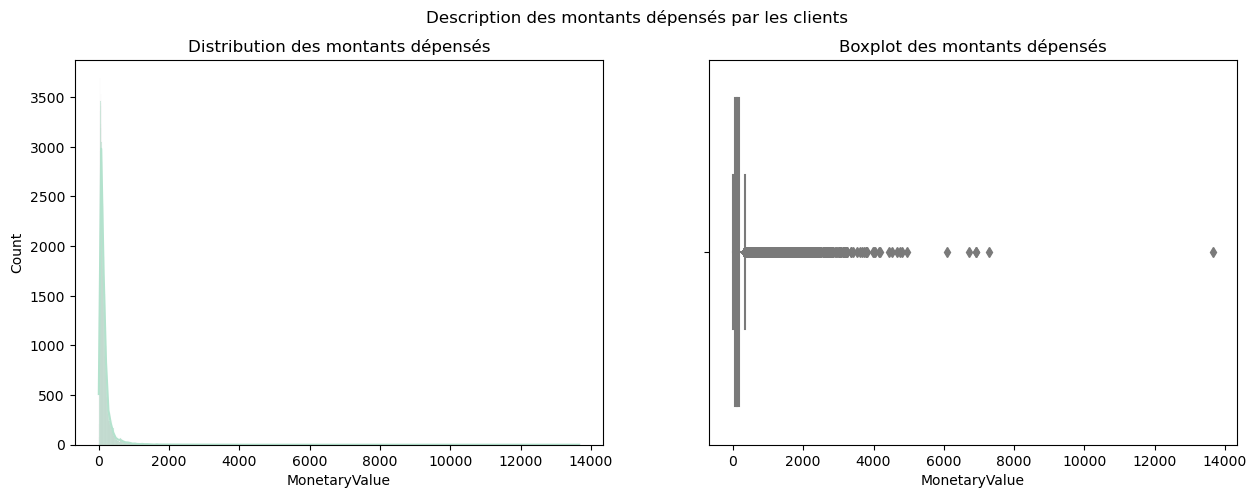

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True)
fig.suptitle('Description des montants dépensés par les clients')

sns.histplot(ax=axes[0],x="MonetaryValue", data=data, kde=True)
axes[0].set_title("Distribution des montants dépensés")

sns.boxplot(ax=axes[1], x="MonetaryValue", data=data)
axes[1].set_title("Boxplot des montants dépensés")

plt.show()

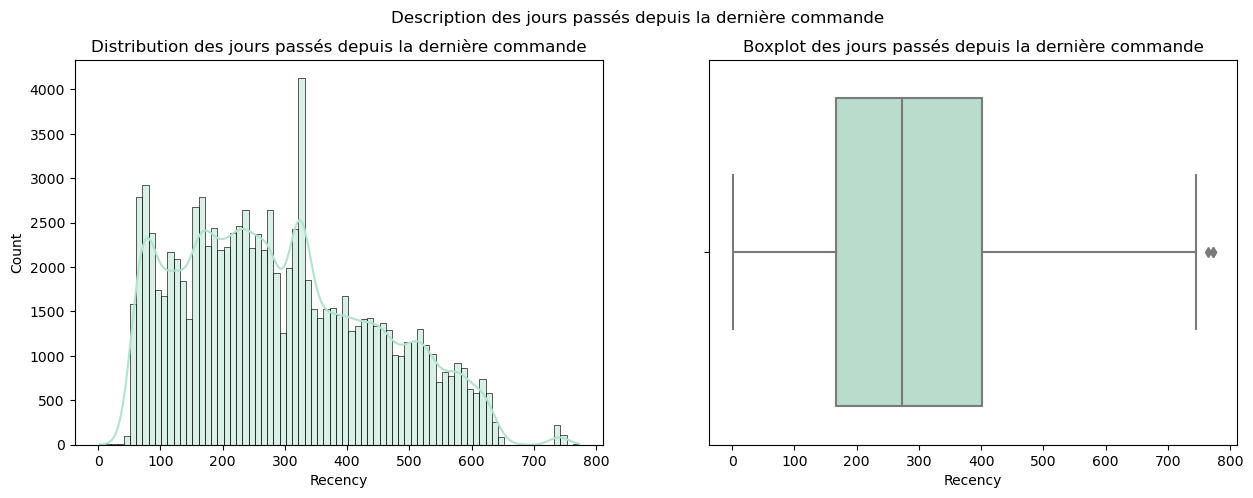

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True)
fig.suptitle('Description des jours passés depuis la dernière commande')

sns.histplot(ax=axes[0],x="Recency", data=data, kde=True)
axes[0].set_title("Distribution des jours passés depuis la dernière commande")

sns.boxplot(ax=axes[1], x="Recency", data=data)
axes[1].set_title("Boxplot des jours passés depuis la dernière commande")

plt.show()

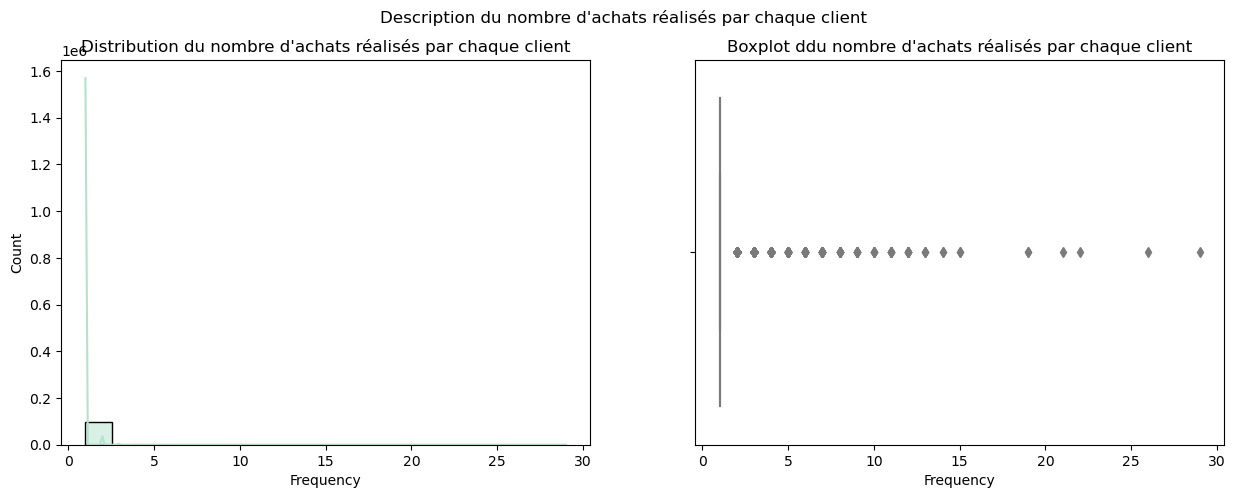

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True)
fig.suptitle('Description du nombre d\'achats réalisés par chaque client')

sns.histplot(ax=axes[0],x="Frequency", data=data, kde=True)
axes[0].set_title("Distribution du nombre d\'achats réalisés par chaque client")

sns.boxplot(ax=axes[1], x="Frequency", data=data)
axes[1].set_title("Boxplot ddu nombre d\'achats réalisés par chaque client")

plt.show()

In [24]:
data.to_csv("datasets/data_segmentation.csv")